In [11]:
import numpy as np, string, utils, preprocess
from pygsp import graphs, filters, plotting
from graph import sparsity
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
book = utils.load_text("books/king-james-bible-processed.txt")
book[:100]

'In the beginning God created the heaven and the earth.\r\nAnd the earth was without form, and void; an'

In [5]:
book_lems = preprocess.words_lems(book, lower=True)
book_lems[:15]

['in',
 'the',
 'beginning',
 'god',
 'create',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.',
 'and',
 'the',
 'earth',
 'be']

In [6]:
words_map = preprocess.words_to_int(book_lems, ignore_punct=True)
print("Corpus size: {}".format(len(words_map)))
[(w, words_map.get(w, -1)) for w in book_lems[:15]]

Corpus size: 13175


[('in', 8624),
 ('the', 10222),
 ('beginning', 8664),
 ('god', 437),
 ('create', 6787),
 ('the', 10222),
 ('heaven', 5426),
 ('and', 5524),
 ('the', 10222),
 ('earth', 11433),
 ('.', -1),
 ('and', 5524),
 ('the', 10222),
 ('earth', 11433),
 ('be', 3580)]

In [7]:
graph = preprocess.build_graph(book_lems, words_map)
graph

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [8]:
print("Sparsity: {:05.2f}%".format(100 * (1 - np.count_nonzero(graph) / graph.size)))

Sparsity: 99.70%


In [24]:
quran = utils.load_text("books/quran-shakir.txt")
print(quran[:103])

quran_graph, words_maps = preprocess.text_to_graph(quran, lang="english", ignore_stopwords=True, self_links=False, return_words_map=True)
print("Sparsity: {:05.2f}%".format(100 * sparsity(quran_graph)))

In the name of Allah, the Beneficent, the Merciful.
All praise is due to Allah, the Lord of the Worlds.
Sparsity: 99.73%


In [3]:
G = graphs.Graph(quran_graph, gtype='Words')

In [4]:
G.set_coordinates()
G.plot()

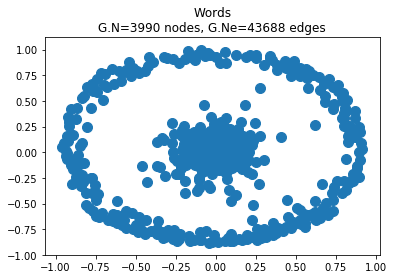

In [6]:
G.plot()

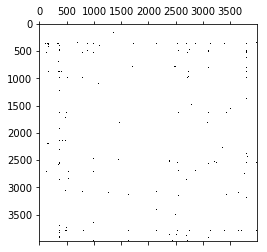

In [10]:
plt.spy(quran_graph)

In [12]:
Gn = nx.from_numpy_matrix(quran_graph)

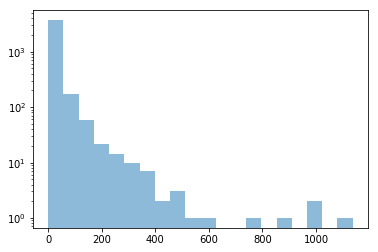

In [16]:
plt.hist([deg for _, deg in Gn.degree()], bins=20, alpha=0.5, label="Random graph", log=True)
plt.show()

In [20]:
giant_G = max(nx.connected_component_subgraphs(Gn), key=len)
len(giant_G.nodes())

3959

In [21]:
len(Gn.nodes())

3990

In [17]:
nx.average_clustering(Gn)

0.45768394291191095

In [36]:
biggest_out_deg = quran_graph.sum(axis=1).argsort()[-10:][::-1]
biggest_out_deg

array([ 187, 3827, 1228, 2421,  276,  412, 3797, 3762, 1498, 1984], dtype=int64)

In [31]:
words_maps_inv = {i:w for w,i in words_maps.items()}

In [38]:
most_words = [words_maps_inv.get(w) for w in biggest_out_deg]

In [39]:
most_words

['allah',
 'shall',
 'surely',
 'make',
 'lord',
 'say',
 'may',
 'give',
 "'s",
 'certainly']

In [40]:
biggest_in_deg = quran_graph.sum(axis=0).argsort()[-10:][::-1]
most_words_in = [words_maps_inv.get(w) for w in biggest_in_deg]
most_words_in

['allah', 'shall', 'say', 'surely', "'s", 'make', 'one', 'come', 'u', 'upon']